### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

In [2]:
root_path = r'C:\EPGP\Deep Learning\CNN Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
## training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            seed=123,
            validation_split=0.2,
            subset="training",
            image_size=(img_height,img_width),
            batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
          data_dir_train,
          seed=123,
          validation_split=0.2,
          subset="validation",
          image_size=(img_height, img_width),
          batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# Listing out classes of all skin cancer types
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


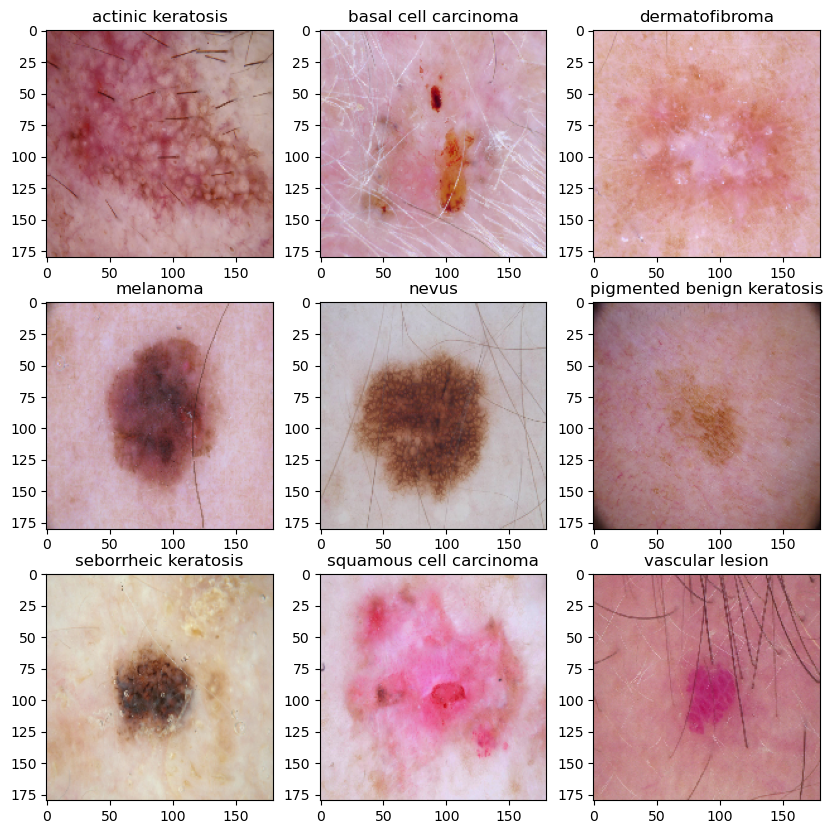

In [8]:
files_path_dict = {}

plt.figure(figsize=(10,10))
index = 0
for cs in class_names:
    files_path_dict[cs] = list(map(lambda x:str(data_dir_train)+'/'+cs+'/'+x, os.listdir(str(data_dir_train)+'/'+cs)))
    path_list = files_path_dict[cs][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height, img_width)))
    plt.title(cs)

    

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
     # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(num_classes, activation='softmax')
])


In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 43s 585ms/step - loss: 2.0645 - accuracy: 0.2070 - val_loss: 1.9377 - val_accuracy: 0.2327
Epoch 2/20
56/56 [==============================] - 30s 541ms/step - loss: 1.7870 - accuracy: 0.3594 - val_loss: 1.7221 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 30s 537ms/step - loss: 1.5886 - accuracy: 0.4353 - val_loss: 1.4435 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 30s 537ms/step - loss: 1.4272 - accuracy: 0.4933 - val_loss: 1.5821 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 30s 533ms/step - loss: 1.3345 - accuracy: 0.5301 - val_loss: 1.4508 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 30s 534ms/step - loss: 1.2538 - accuracy: 0.5497 - val_loss: 1.4930 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 29s 526ms/step - loss: 1.1613 - accuracy: 0.5826 - val_loss: 1.3667 - val_accuracy: 0.5302

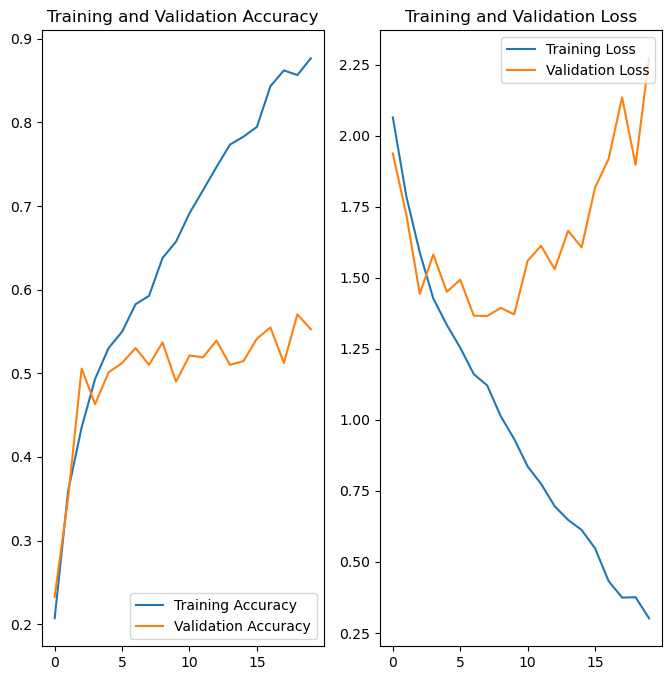

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

#### Here we will rescale input in the [0, 255] range to be in the [0, 1].
rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range. We will flip each image horizontally and vertically, rotate image and zoom during training.
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

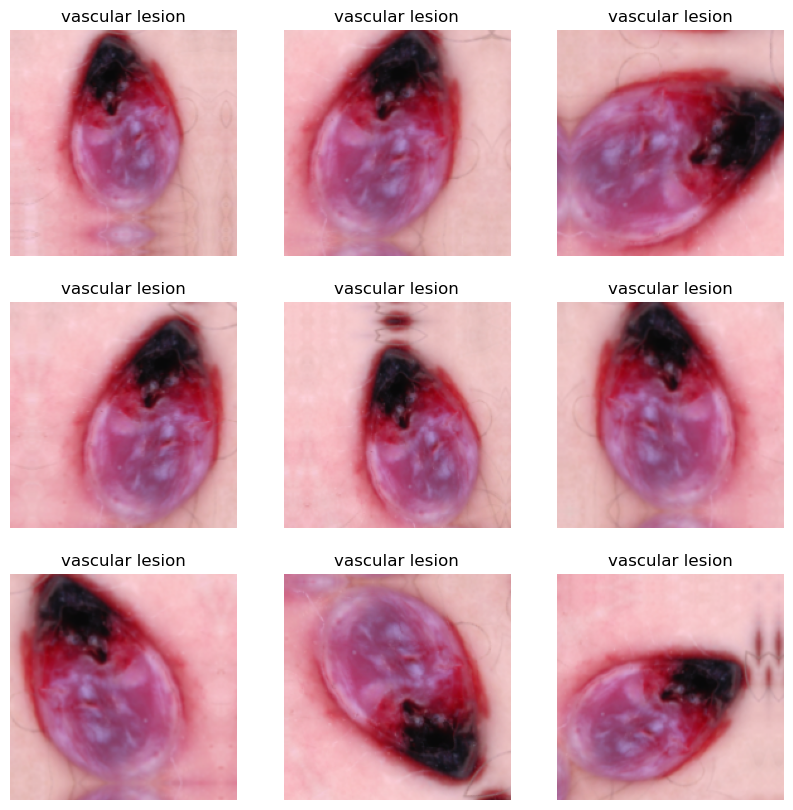

In [17]:
# visualize augmentated images for one instance of training image.
plt.figure(figsize=(10, 10))
for imgs, labels in train_ds.take(1):
    for i in range(num_classes):
        augmented_imgs = data_augmentation(imgs)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_imgs[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer  

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))
#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 32s 547ms/step - loss: 0.3309 - accuracy: 0.8722 - val_loss: 2.0229 - val_accuracy: 0.5257
Epoch 2/20
56/56 [==============================] - 30s 543ms/step - loss: 0.2469 - accuracy: 0.9001 - val_loss: 2.4800 - val_accuracy: 0.5145
Epoch 3/20
56/56 [==============================] - 29s 523ms/step - loss: 0.2769 - accuracy: 0.8890 - val_loss: 2.3785 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 29s 519ms/step - loss: 0.2629 - accuracy: 0.9046 - val_loss: 2.4398 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 29s 521ms/step - loss: 0.2752 - accuracy: 0.8973 - val_loss: 2.6109 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 29s 522ms/step - loss: 0.1880 - accuracy: 0.9202 - val_loss: 2.7087 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 29s 524ms/step - loss: 0.1654 - accuracy: 0.9319 - val_loss: 2.6428 - val_accuracy: 0.5101

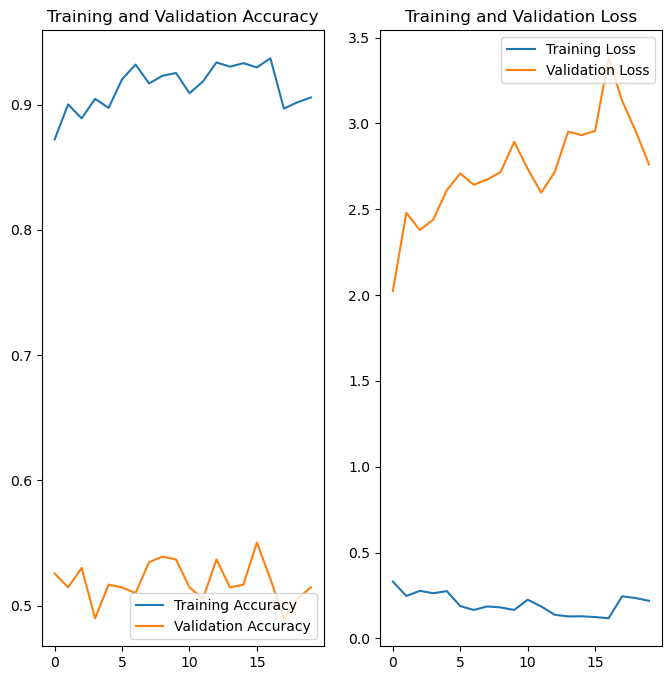

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
import Augmentor

In [35]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [37]:
path_to_training_dataset=r"C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
for i in class_names:
    output_dir = os.path.join(path_to_training_dataset, i, "output")
    os.makedirs(output_dir, exist_ok=True)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AC11B7DDF0>: 100%|█| 500/500 [00:04<00:00, 110.09 Samples


Initialised with 376 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AC11993BE0>: 100%|█| 500/500 [00:04<00:00, 108.86 Samples


Initialised with 95 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AC119BEBE0>: 100%|█| 500/500 [00:04<00:00, 112.75 Samples


Initialised with 438 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2AC05827400>: 100%|█| 500/500 [00:27<00:00, 18.13 Samples/


Initialised with 357 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x2AC08649670>: 100%|█| 500/500 [00:18<00:


Initialised with 462 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AC08678FD0>: 100%|█| 500/500 [00:04<00:00, 103.63 Samples


Initialised with 77 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2AC059CC2E0>: 100%|█| 500/500 [00:10<00:00, 46.93 Samples


Initialised with 181 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2AC0509FCA0>: 100%|█| 500/500 [00:04<00:


Initialised with 139 image(s) found.
Output directory set to C:\\EPGP\\Deep Learning\\CNN Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2AC0582BA00>: 100%|█| 500/500 [00:04<00:
